'f1db-csv/f1db-races.csv',
'f1db-csv/f1db-races-race-results.csv',
'f1db-csv/f1db-races-constructor-standings.csv',
'f1db-csv/f1db-races-driver-standings.csv',
'f1db-csv/f1db-races-fastest-laps.csv',
'f1db-csv/f1db-races-starting-grid-positions.csv',
'f1db-csv/f1db-circuits.csv',
'f1db-csv/f1db-constructors.csv',
'f1db-csv/f1db-drivers.csv',
'f1db-csv/f1db-engine-manufacturers.csv',


'f1db-csv/f1db-races-pit-stops.csv',
'f1db-csv/f1db-races-qualifying-results.csv',
'f1db-csv/f1db-constructors-chronology.csv',
'f1db-csv/f1db-seasons-constructors.csv',
'f1db-csv/f1db-seasons-drivers.csv',
'f1db-csv/f1db-seasons-engine-manufacturers.csv',
'f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv',

In [19]:
import pandas as pd

In [82]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [20]:
csv_files = [
        'f1db-csv/f1db-races-race-results.csv',
        'f1db-csv/f1db-circuits.csv',
        'f1db-csv/f1db-constructors-chronology.csv',
        'f1db-csv/f1db-constructors.csv',
        'f1db-csv/f1db-drivers.csv',
        'f1db-csv/f1db-engine-manufacturers.csv',
        'f1db-csv/f1db-races-constructor-standings.csv',
        'f1db-csv/f1db-races-driver-standings.csv',
        'f1db-csv/f1db-races-fastest-laps.csv',
        'f1db-csv/f1db-races-pit-stops.csv',
        'f1db-csv/f1db-races-qualifying-results.csv',
        'f1db-csv/f1db-races-starting-grid-positions.csv',
        'f1db-csv/f1db-races.csv',
        'f1db-csv/f1db-seasons-constructors.csv',
        'f1db-csv/f1db-seasons-drivers.csv',
        'f1db-csv/f1db-seasons-engine-manufacturers.csv',
        'f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv'
        ]

In [21]:
df_merged = pd.read_csv(csv_files[0])

C:\Users\ruana\AppData\Local\Temp\ipykernel_20552\3304667959.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(csv_files[0])


In [13]:
df_merged2 = pd.read_csv(csv_files[1])
df_merged2.head()

,id,name,fullName,previousNames,type,direction,placeName,countryId,latitude,longitude,length,turns,totalRacesHeld
0,adelaide,Adelaide,Adelaide Street Circuit,NaN,STREET,CLOCKWISE,Adelaide,australia,-34.927222,138.617222,3.780,16,11
1,aida,Aida,Okayama International Circuit,TI Circuit Aida,RACE,CLOCKWISE,Aida,japan,34.915000,134.221111,3.703,13,2
2,ain-diab,Ain-Diab,Ain-Diab Circuit,NaN,ROAD,CLOCKWISE,Casablanca,morocco,33.578611,-7.687500,7.618,18,1
3,aintree,Aintree,Aintree Motor Racing Circuit,NaN,ROAD,CLOCKWISE,Aintree,united-kingdom,53.476944,-2.940556,4.828,8,5
4,anderstorp,Anderstorp Raceway,Anderstorp Raceway,Scandinavian Raceway,RACE,CLOCKWISE,Anderstorp,sweden,57.264167,13.601389,4.031,8,6


In [23]:
col_lista = []
for file in csv_files:
    # print(file)
    df = pd.read_csv(file)
    for col in df.columns:
        # print(col)
        col_dict = {}
        if col=='id':
            base = file.split('/f1db-')[-1].replace('.csv', '')
            # print(base)
            partes = base.split('-')
            col_id = partes[0] + ''.join(p.capitalize() for p in partes[1:]) + 'Id'
            # print(col_id)
            col_dict['file'] = file
            col_dict['column_id'] = col_id
            col_dict['chave_primaria'] = True 
            col_lista.append(col_dict)
        elif 'Id' in col:
            col_dict['file'] = file
            col_dict['column_id'] = col
            col_dict['chave_primaria'] = False
            col_lista.append(col_dict)
        else:
            pass

C:\Users\ruana\AppData\Local\Temp\ipykernel_20552\3957731232.py:4: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [24]:
col_lista

[{'file': 'f1db-csv/f1db-races-race-results.csv',
  'column_id': 'raceId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1db-races-race-results.csv',
  'column_id': 'driverId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1db-races-race-results.csv',
  'column_id': 'constructorId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1db-races-race-results.csv',
  'column_id': 'engineManufacturerId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1db-races-race-results.csv',
  'column_id': 'tyreManufacturerId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1db-circuits.csv',
  'column_id': 'circuitsId',
  'chave_primaria': True},
 {'file': 'f1db-csv/f1db-circuits.csv',
  'column_id': 'countryId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1db-constructors-chronology.csv',
  'column_id': 'parentConstructorId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1db-constructors-chronology.csv',
  'column_id': 'constructorId',
  'chave_primaria': False},
 {'file': 'f1db-csv/f1

In [26]:
df_column_id = pd.DataFrame(col_lista)
df_column_id.head()

,file,column_id,chave_primaria
0,f1db-csv/f1db-races-race-results.csv,raceId,False
1,f1db-csv/f1db-races-race-results.csv,driverId,False
2,f1db-csv/f1db-races-race-results.csv,constructorId,False
3,f1db-csv/f1db-races-race-results.csv,engineManufacturerId,False
4,f1db-csv/f1db-races-race-results.csv,tyreManufacturerId,False


In [31]:
df_column_id[df_column_id['chave_primaria'] == False][['column_id']].sort_values('column_id').drop_duplicates().reset_index(drop=True)

,column_id
0,circuitId
1,constructorId
2,countryId
3,countryOfBirthCountryId
4,driverId
5,engineManufacturerId
6,entrantId
7,grandPrixId
8,nationalityCountryId
9,parentConstructorId


In [32]:
df_column_id[['column_id']].sort_values('column_id').drop_duplicates().reset_index(drop=True)

,column_id
0,circuitId
1,circuitsId
2,constructorId
3,constructorsId
4,countryId
5,countryOfBirthCountryId
6,driverId
7,driversId
8,engineManufacturerId
9,engineManufacturersId


In [33]:
df_column_id['column_id_wo_s'] = df_column_id['column_id'].str.replace('sId', 'Id')

In [35]:
df_column_id[['column_id_wo_s']].sort_values('column_id_wo_s').drop_duplicates().reset_index(drop=True)

,column_id_wo_s
0,circuitId
1,constructorId
2,countryId
3,countryOfBirthCountryId
4,driverId
5,engineManufacturerId
6,entrantId
7,grandPrixId
8,nationalityCountryId
9,parentConstructorId


In [14]:
df_column_id['column_id_wo_s'] = df_column_id['column_id'].str.replace('sId', 'Id')

In [64]:
df_file_ids = df_column_id[['file', 'column_id_wo_s']].drop_duplicates()

In [85]:
df_file_ids

,file,column_id_wo_s
0,f1db-csv/f1db-races-race-results.csv,raceId
1,f1db-csv/f1db-races-race-results.csv,driverId
2,f1db-csv/f1db-races-race-results.csv,constructorId
3,f1db-csv/f1db-races-race-results.csv,engineManufacturerId
4,f1db-csv/f1db-races-race-results.csv,tyreManufacturerId
5,f1db-csv/f1db-circuits.csv,circuitId
6,f1db-csv/f1db-circuits.csv,countryId
7,f1db-csv/f1db-constructors-chronology.csv,parentConstructorId
8,f1db-csv/f1db-constructors-chronology.csv,constructorId
9,f1db-csv/f1db-constructors.csv,constructorId


In [73]:
# import networkx as nx
# import matplotlib.pyplot as plt

# G = nx.Graph()

# G.add_nodes_from(df_file_ids['file'], bipartite=0)
# G.add_nodes_from(df_file_ids['column_id_wo_s'], bipartite=1)

# edges = list(df_file_ids.itertuples(index=False, name=None))
# G.add_edges_from(edges)

# # separar os dois grupos de nós
# files = df_file_ids['file'].unique()
# columns = df_file_ids['column_id_wo_s'].unique()

# # layout
# pos = nx.spring_layout(G, k=0.5, seed=42)

# # plotar
# plt.figure(figsize=(12, 8))
# nx.draw_networkx_nodes(G, pos, nodelist=files, node_color='skyblue', node_size=800, label='Files')
# nx.draw_networkx_nodes(G, pos, nodelist=columns, node_color='lightgreen', node_size=800, label='Column IDs')
# nx.draw_networkx_edges(G, pos, alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=8)

# plt.title("Grafo bipartido: arquivos x IDs")
# plt.axis('off')
# plt.legend()
# plt.show()


In [74]:
col_to_files = df_file_ids.groupby('column_id_wo_s')['file'].unique().reset_index()

In [83]:
col_to_files

,column_id_wo_s,file
0,circuitId,"[f1db-csv/f1db-circuits.csv, f1db-csv/f1db-races.csv]"
1,constructorId,"[f1db-csv/f1db-races-race-results.csv, f1db-csv/f1db-constructors-chronology.csv, f1db-csv/f1db-constructors.csv, f1db-csv/f1db-races-constructor-standings.csv, f1db-csv/f1db-races-fastest-laps.csv, f1db-csv/f1db-races-pit-stops.csv, f1db-csv/f1db-races-qualifying-results.csv, f1db-csv/f1db-races-starting-grid-positions.csv, f1db-csv/f1db-seasons-constructors.csv, f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv]"
2,countryId,"[f1db-csv/f1db-circuits.csv, f1db-csv/f1db-constructors.csv, f1db-csv/f1db-engine-manufacturers.csv]"
3,countryOfBirthCountryId,[f1db-csv/f1db-drivers.csv]
4,driverId,"[f1db-csv/f1db-races-race-results.csv, f1db-csv/f1db-drivers.csv, f1db-csv/f1db-races-driver-standings.csv, f1db-csv/f1db-races-fastest-laps.csv, f1db-csv/f1db-races-pit-stops.csv, f1db-csv/f1db-races-qualifying-results.csv, f1db-csv/f1db-races-starting-grid-positions.csv, f1db-csv/f1db-seasons-drivers.csv]"
5,engineManufacturerId,"[f1db-csv/f1db-races-race-results.csv, f1db-csv/f1db-engine-manufacturers.csv, f1db-csv/f1db-races-constructor-standings.csv, f1db-csv/f1db-races-fastest-laps.csv, f1db-csv/f1db-races-pit-stops.csv, f1db-csv/f1db-races-qualifying-results.csv, f1db-csv/f1db-races-starting-grid-positions.csv, f1db-csv/f1db-seasons-engine-manufacturers.csv, f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv]"
6,entrantId,[f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv]
7,grandPrixId,[f1db-csv/f1db-races.csv]
8,nationalityCountryId,[f1db-csv/f1db-drivers.csv]
9,parentConstructorId,[f1db-csv/f1db-constructors-chronology.csv]


# Read

In [51]:
df_races = pd.read_csv('f1db-csv/f1db-races.csv')
df_races.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1149 non-null   int64  
 1   year                             1149 non-null   int64  
 2   round                            1149 non-null   int64  
 3   date                             1149 non-null   object 
 4   time                             48 non-null     object 
 5   grandPrixId                      1149 non-null   object 
 6   officialName                     1149 non-null   object 
 7   qualifyingFormat                 1149 non-null   object 
 8   sprintQualifyingFormat           18 non-null     object 
 9   circuitId                        1149 non-null   object 
 10  circuitType                      1149 non-null   object 
 11  direction                        1149 non-null   object 
 12  courseLength        

In [90]:
df_races.rename(columns={'id': 'raceId'}, inplace=True)

In [100]:
df_races_race_results = pd.read_csv('f1db-csv/f1db-races-race-results.csv')
df_races_race_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26891 entries, 0 to 26890
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   raceId                       26891 non-null  int64  
 1   year                         26891 non-null  int64  
 2   round                        26891 non-null  int64  
 3   positionDisplayOrder         26891 non-null  int64  
 4   positionNumber               16078 non-null  float64
 5   positionText                 26891 non-null  object 
 6   driverNumber                 26891 non-null  int64  
 7   driverId                     26891 non-null  object 
 8   constructorId                26891 non-null  object 
 9   engineManufacturerId         26891 non-null  object 
 10  tyreManufacturerId           26891 non-null  object 
 11  sharedCar                    26891 non-null  bool   
 12  laps                         24971 non-null  float64
 13  time            

C:\Users\ruana\AppData\Local\Temp\ipykernel_20552\2085592299.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_races_race_results = pd.read_csv('f1db-csv/f1db-races-race-results.csv')


In [101]:
df_races_constructor_standings = pd.read_csv('f1db-csv/f1db-races-constructor-standings.csv')
df_races_constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10289 entries, 0 to 10288
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   raceId                10289 non-null  int64  
 1   year                  10289 non-null  int64  
 2   round                 10289 non-null  int64  
 3   positionDisplayOrder  10289 non-null  int64  
 4   positionNumber        10272 non-null  float64
 5   positionText          10289 non-null  object 
 6   constructorId         10289 non-null  object 
 7   engineManufacturerId  10289 non-null  object 
 8   points                10289 non-null  float64
 9   positionsGained       9845 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 804.0+ KB


In [102]:
df_races_driver_standings = pd.read_csv('f1db-csv/f1db-races-driver-standings.csv')
df_races_driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20790 entries, 0 to 20789
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   raceId                20790 non-null  int64  
 1   year                  20790 non-null  int64  
 2   round                 20790 non-null  int64  
 3   positionDisplayOrder  20790 non-null  int64  
 4   positionNumber        20789 non-null  float64
 5   positionText          20790 non-null  object 
 6   driverId              20790 non-null  object 
 7   points                20790 non-null  float64
 8   positionsGained       20111 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.4+ MB


In [129]:
df_races_fastest_laps = pd.read_csv('f1db-csv/f1db-races-fastest-laps.csv')
df_races_fastest_laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16467 entries, 0 to 16466
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   raceId                16467 non-null  int64  
 1   year                  16467 non-null  int64  
 2   round                 16467 non-null  int64  
 3   positionDisplayOrder  16467 non-null  int64  
 4   positionNumber        16467 non-null  int64  
 5   positionText          16467 non-null  int64  
 6   driverNumber          16467 non-null  int64  
 7   driverId              16467 non-null  object 
 8   constructorId         16467 non-null  object 
 9   engineManufacturerId  16467 non-null  object 
 10  tyreManufacturerId    16467 non-null  object 
 11  lap                   16437 non-null  float64
 12  time                  16467 non-null  object 
 13  timeMillis            16467 non-null  int64  
 14  gap                   15338 non-null  object 
 15  gapMillis          

In [130]:
df_races_pit_stops = pd.read_csv('f1db-csv/f1db-races-pit-stops.csv')
df_races_qualifying_results = pd.read_csv('f1db-csv/f1db-races-qualifying-results.csv')
df_races_starting_grid_positions = pd.read_csv('f1db-csv/f1db-races-starting-grid-positions.csv')

In [ ]:
df_circuits = pd.read_csv('f1db-csv/f1db-circuits.csv')
df_constructors_chronology = pd.read_csv('f1db-csv/f1db-constructors-chronology.csv')
df_constructors = pd.read_csv('f1db-csv/f1db-constructors.csv')
df_drivers = pd.read_csv('f1db-csv/f1db-drivers.csv')
df_engine_manufacturers = pd.read_csv('f1db-csv/f1db-engine-manufacturers.csv')
df_seasons_constructors = pd.read_csv('f1db-csv/f1db-seasons-constructors.csv')
df_seasons_drivers = pd.read_csv('f1db-csv/f1db-seasons-drivers.csv')
df_seasons_engine_manufacturers = pd.read_csv('f1db-csv/f1db-seasons-engine-manufacturers.csv')
df_seasons_entrants_tyre_manufacturers = pd.read_csv('f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv')

In [285]:
def prefixar_sem_id(df, prefixo):
    return df.rename(columns={
        col: f"{prefixo}{col}" if "Id" not in col else col
        for col in df.columns
    })

In [156]:
from itertools import combinations

def encontrar_chave(df, colunas=None, max_comb=10, verbose=False):
    if colunas is None:
        # pega apenas colunas que parecem ser IDs
        colunas = [col for col in df.columns if ((col=='id') or ('Id' in col))]
        print(colunas)
    
    for r in range(1, min(len(colunas), max_comb) + 1):
        for comb in combinations(colunas, r):
            n_unique = df[list(comb)].drop_duplicates().shape[0]
            if verbose:
                print(f"Testando: {comb} → {n_unique} únicos")
            if n_unique == len(df):
                return comb  # encontrou chave única

    return None  # nenhuma combinação encontrada

In [ ]:
df_circuits
df_constructors_chronology
df_constructors
df_drivers
df_engine_manufacturers
df_seasons_constructors
df_seasons_drivers
df_seasons_engine_manufacturers
df_seasons_entrants_tyre_manufacturers

In [299]:
encontrar_chave(df_seasons_entrants_tyre_manufacturers, verbose=False)

['entrantId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']


In [242]:
df_circuits.rename(columns={'id': 'circuitId'}, inplace=True)
df_constructors.rename(columns={'id': 'constructorId'}, inplace=True)
df_drivers.rename(columns={'id': 'driverId'}, inplace=True)
df_engine_manufacturers.rename(columns={'id': 'engineManufacturerId'}, inplace=True)

In [300]:
df_seasons_entrants_tyre_manufacturers.head()

,year,entrantId,constructorId,engineManufacturerId,tyreManufacturerId
0,1950,alfa-romeo-spa,alfa-romeo,alfa-romeo,pirelli
1,1950,andy-granatelli,kurtis-kraft,offenhauser,firestone
2,1950,antonio-branca,maserati,maserati,pirelli
3,1950,automobiles-talbot-darracq,talbot-lago,talbot-lago,dunlop
4,1950,bardahl,marchese,offenhauser,firestone


In [308]:
df_seasons_entrants_tyre_manufacturers[df_seasons_entrants_tyre_manufacturers.duplicated(subset=['year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'], keep=False)].sort_values(['year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'])

,year,entrantId,constructorId,engineManufacturerId,tyreManufacturerId
23,1950,geoffrey-crossley,alta,alta,dunlop
33,1950,joe-kelly,alta,alta,dunlop
5,1950,blue-crown-spark-plug,deidt,offenhauser,firestone
28,1950,howard-keck,deidt,offenhauser,firestone
8,1950,bob-gerard,era,era,dunlop
...,...,...,...,...,...
1390,1982,rothmans-march-grand-prix-team,march,ford,avon
1381,1982,lbt-team-march,march,ford,pirelli
1389,1982,rothmans-march-grand-prix-team,march,ford,pirelli
1868,2018,racing-point-force-india-f1-team,force-india,mercedes,pirelli


In [309]:
df_seasons_constructors.head()

,year,constructorId,positionNumber,positionText,bestStartingGridPosition,bestRaceResult,totalRaceEntries,totalRaceStarts,totalRaceWins,total1And2Finishes,totalRaceLaps,totalPodiums,totalPodiumRaces,totalPoints,totalPolePositions,totalFastestLaps
0,1950,alfa-romeo,NaN,NaN,1.0,1.0,6,6,6,4,1005,12,6,89.0,6,6
1,1950,kurtis-kraft,NaN,NaN,1.0,1.0,1,1,1,0,1492,1,1,14.0,1,1
2,1950,maserati,NaN,NaN,3.0,3.0,7,7,0,0,1220,1,1,11.0,0,0
3,1950,talbot-lago,NaN,NaN,4.0,3.0,6,6,0,0,1264,2,2,20.0,0,0
4,1950,marchese,NaN,NaN,16.0,11.0,1,1,0,0,133,0,0,0.0,0,0


In [315]:
df_constructors_chronology[df_constructors_chronology.duplicated(subset=['parentConstructorId', 'constructorId'], keep=False)].sort_values(['constructorId', 'parentConstructorId'])

,parentConstructorId,positionDisplayOrder,constructorId,yearFrom,yearTo
18,arrows,1,arrows,1978,1990.0
20,arrows,3,arrows,1997,2002.0
54,footwork,1,arrows,1978,1990.0
56,footwork,3,arrows,1997,2002.0
92,leyton-house,1,march,1970,1989.0
94,leyton-house,3,march,1992,1992.0
108,march,1,march,1970,1989.0
110,march,3,march,1992,1992.0
12,alpine,3,renault,2002,2011.0
14,alpine,5,renault,2016,2020.0


In [339]:
df_merge = df_races \
    .merge(prefixar_sem_id(df_races_race_results, 'races_race_results_'), how='left', on='raceId') \
    .merge(prefixar_sem_id(df_races_constructor_standings, 'races_constructor_standings_'), how='left', on=['raceId', 'constructorId', 'engineManufacturerId']) \
    .merge(prefixar_sem_id(df_races_driver_standings, 'races_driver_standings_'), how='left', on=['raceId', 'driverId']) \
    .merge(prefixar_sem_id(df_races_fastest_laps, 'races_fastest_laps_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    .merge(prefixar_sem_id(df_races_starting_grid_positions, 'races_starting_grid_positions_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    .merge(prefixar_sem_id(df_circuits, 'circuits_'), how='left', on=['circuitId']) \
    .merge(prefixar_sem_id(df_constructors, 'constructors_'), how='left', on=['constructorId']) \
    .merge(prefixar_sem_id(df_drivers, 'drivers_'), how='left', on=['driverId']) \
    .merge(prefixar_sem_id(df_engine_manufacturers, 'engine_manufacturers_'), how='left', on=['engineManufacturerId']) \
    .merge(prefixar_sem_id(df_seasons_constructors, 'seasons_constructors_'), how='left', left_on=['constructorId', 'year'], right_on=['constructorId', 'seasons_constructors_year']) \
    .merge(prefixar_sem_id(df_seasons_drivers, 'seasons_drivers_'), how='left', left_on=['driverId', 'year'], right_on=['driverId', 'seasons_drivers_year']) \
    .merge(prefixar_sem_id(df_seasons_engine_manufacturers, 'seasons_engine_manufacturers_'), how='left', left_on=['engineManufacturerId', 'year'], right_on=['engineManufacturerId', 'seasons_engine_manufacturers_year']) \
    # .merge(prefixar_sem_id(df_constructors_chronology, 'constructors_chronology_'), how='left', on=['constructorId']) \
    # .merge(prefixar_sem_id(df_seasons_entrants_tyre_manufacturers, 'seasons_entrants_tyre_manufacturers_'), how='left', left_on=['year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'], right_on=['seasons_entrants_tyre_manufacturers_year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_races_qualifying_results, 'races_qualifying_results_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_races_pit_stops, 'races_pit_stops_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'])

In [326]:
df_seasons_entrants_tyre_manufacturers[df_seasons_entrants_tyre_manufacturers.duplicated(subset=['constructorId', 'tyreManufacturerId', 'year'], keep=False)].sort_values(['constructorId', 'tyreManufacturerId', 'year'])

,year,entrantId,constructorId,engineManufacturerId,tyreManufacturerId
165,1952,helmut-niedermayr,afm,bmw,dunlop
177,1952,ludwig-fischer,afm,bmw,dunlop
203,1952,willi-heeks,afm,bmw,dunlop
204,1952,willi-krakau,afm,bmw,dunlop
245,1953,gunther-bechem,afm,bmw,dunlop
...,...,...,...,...,...
1415,1983,tag-williams-team,williams,honda,goodyear
1302,1978,theodore-racing-hong-kong,wolf,ford,goodyear
1304,1978,walter-wolf-racing,wolf,ford,goodyear
1219,1976,mapfre-williams,wolf-williams,ford,goodyear


In [ ]:
df_races_race_results[]

,raceId,year,round,positionDisplayOrder,positionNumber,positionText,driverNumber,driverId,constructorId,engineManufacturerId,tyreManufacturerId,sharedCar,laps,time,timeMillis,timePenalty,timePenaltyMillis,gap,gapMillis,gapLaps,interval,intervalMillis,reasonRetired,points,polePosition,qualificationPositionNumber,qualificationPositionText,gridPositionNumber,gridPositionText,positionsGained,pitStops,fastestLap,driverOfTheDay,grandSlam
0,1,1950,1,1,1.0,1,2,nino-farina,alfa-romeo,alfa-romeo,pirelli,False,70.0,2:13:23.600,8003600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,True,1.0,1,1.0,1,0.0,NaN,True,NaN,False
1,1,1950,1,2,2.0,2,3,luigi-fagioli,alfa-romeo,alfa-romeo,pirelli,False,70.0,2:13:26.200,8006200.0,NaN,NaN,+2.600,2600.0,NaN,+2.600,2600.0,NaN,6.0,False,2.0,2,2.0,2,0.0,NaN,False,NaN,False
2,1,1950,1,3,3.0,3,4,reg-parnell,alfa-romeo,alfa-romeo,pirelli,False,70.0,2:14:15.600,8055600.0,NaN,NaN,+52.000,52000.0,NaN,+49.400,49400.0,NaN,4.0,False,4.0,4,4.0,4,1.0,NaN,False,NaN,False
3,1,1950,1,4,4.0,4,14,yves-giraud-cabantous,talbot-lago,talbot-lago,dunlop,False,68.0,NaN,NaN,NaN,NaN,+2 laps,NaN,2.0,NaN,NaN,NaN,3.0,False,6.0,6,6.0,6,2.0,NaN,False,NaN,False
4,1,1950,1,5,5.0,5,15,louis-rosier,talbot-lago,talbot-lago,dunlop,False,68.0,NaN,NaN,NaN,NaN,+2 laps,NaN,2.0,NaN,NaN,NaN,2.0,False,9.0,9,9.0,9,4.0,NaN,False,NaN,False


In [ ]:
df_races_race_results

In [380]:
df_races.head()

,raceId,year,round,date,time,grandPrixId,officialName,qualifyingFormat,sprintQualifyingFormat,circuitId,circuitType,direction,courseLength,turns,laps,distance,scheduledLaps,scheduledDistance,driversChampionshipDecider,constructorsChampionshipDecider,preQualifyingDate,preQualifyingTime,freePractice1Date,freePractice1Time,freePractice2Date,freePractice2Time,freePractice3Date,freePractice3Time,freePractice4Date,freePractice4Time,qualifying1Date,qualifying1Time,qualifying2Date,qualifying2Time,qualifyingDate,qualifyingTime,sprintQualifyingDate,sprintQualifyingTime,sprintRaceDate,sprintRaceTime,warmingUpDate,warmingUpTime
0,1,1950,1,1950-05-13,NaN,great-britain,1950 RAC British Grand Prix,TWO_SESSION,NaN,silverstone,RACE,CLOCKWISE,4.649,8,70,325.430,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1950,2,1950-05-21,NaN,monaco,Grand Prix de Monaco 1950,TWO_SESSION,NaN,monaco,STREET,CLOCKWISE,3.180,14,100,318.000,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1950,3,1950-05-30,NaN,indianapolis,1950 Indianapolis 500,FOUR_LAPS,NaN,indianapolis,RACE,CLOCKWISE,4.023,4,138,555.224,200.0,804.672,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1950,4,1950-06-04,NaN,switzerland,Grosser Preis der Schweiz 1950,TWO_SESSION,NaN,bremgarten,ROAD,CLOCKWISE,7.280,13,42,305.760,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1950,5,1950-06-18,NaN,belgium,1950 Belgian Grand Prix,TWO_SESSION,NaN,spa-francorchamps,ROAD,CLOCKWISE,14.120,21,35,494.200,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array(['silverstone', 'monaco', 'indianapolis', 'bremgarten',
       'spa-francorchamps', 'reims', 'monza', 'nurburgring', 'pedralbes',
       'rouen', 'zandvoort', 'buenos-aires', 'aintree', 'pescara',
       'porto', 'ain-diab', 'avus', 'monsanto', 'sebring', 'riverside',
       'watkins-glen', 'east-london', 'mexico-city', 'brands-hatch',
       'zeltweg', 'clermont-ferrand', 'kyalami', 'bugatti', 'mosport',
       'jarama', 'mont-tremblant', 'montjuic', 'hockenheimring',
       'spielberg', 'paul-ricard', 'nivelles', 'interlagos', 'zolder',
       'anderstorp', 'dijon', 'long-beach', 'fuji', 'jacarepagua',
       'montreal', 'imola', 'caesars-palace', 'detroit', 'dallas',
       'estoril', 'adelaide', 'jerez', 'hungaroring', 'suzuka', 'phoenix',
       'magny-cours', 'catalunya', 'donington', 'aida', 'melbourne',
       'sepang', 'bahrain', 'shanghai', 'istanbul', 'valencia',
       'marina-bay', 'yas-marina', 'yeongam', 'buddh', 'austin', 'sochi',
       'baku', 'mugello', 'portim

In [379]:
df_merge['circuitType'].unique()

array(['RACE', 'STREET', 'ROAD'], dtype=object)

In [340]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26911 entries, 0 to 26910
Columns: 232 entries, raceId to seasons_engine_manufacturers_totalFastestLaps
dtypes: bool(2), float64(150), int64(7), object(73)
memory usage: 47.3+ MB


In [350]:
len(df_merge[(df_merge['races_race_results_positionNumber'] != 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)]['raceId'].unique())

646

In [351]:
len(df_merge[(df_merge['races_race_results_positionNumber'] == 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)]['raceId'].unique())

483

In [387]:
df_merge['pole_ganhou'] = (df_merge['races_race_results_positionNumber'] == 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)

In [365]:
df_sorted = df_races_race_results[['raceId', 'year', 'pole_ganhou']].sort_values(by='pole_ganhou', ascending=False)

In [366]:
df_final = df_sorted.drop_duplicates(subset='raceId', keep='first').sort_values('raceId')

In [374]:
df_final[df_final['pole_ganhou'] == True].count()

raceId         483
year           483
pole_ganhou    483
dtype: int64

In [375]:
df_final[df_final['pole_ganhou'] == False].count()

raceId         646
year           646
pole_ganhou    646
dtype: int64

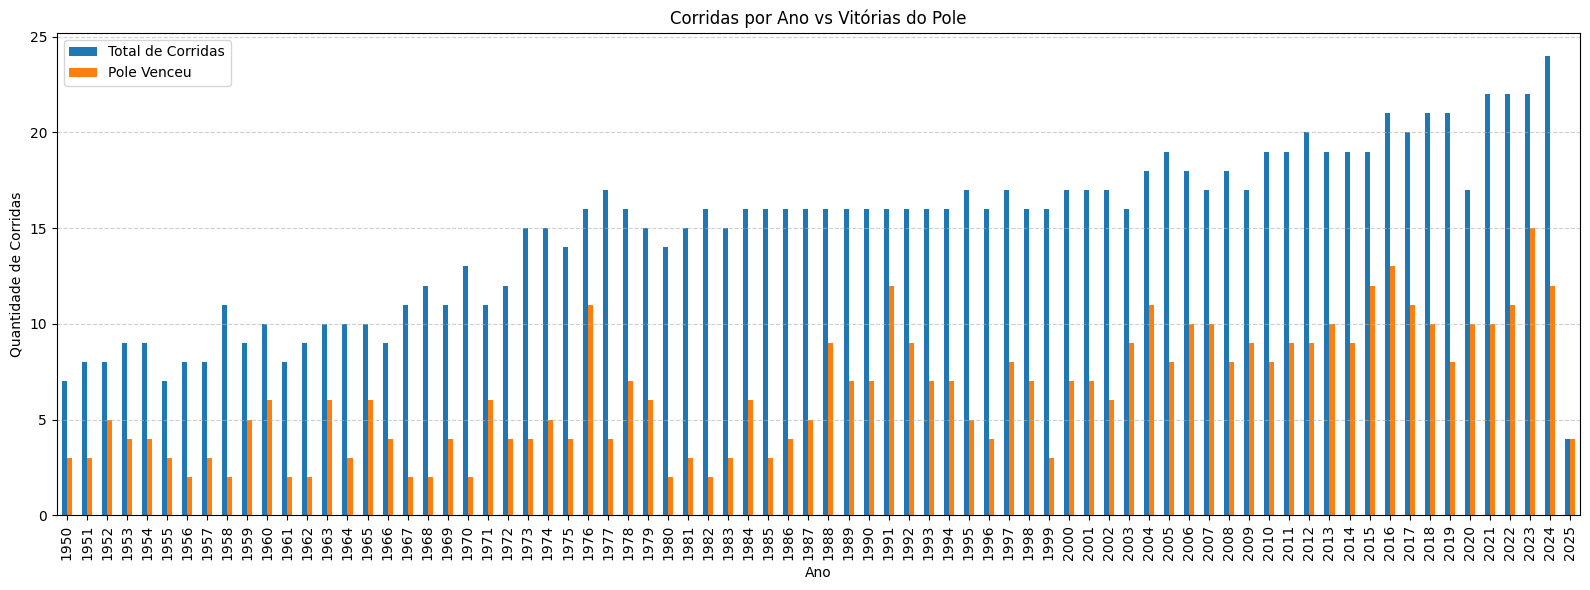

In [370]:
import matplotlib.pyplot as plt

# Total de corridas por ano
total_por_ano = df_final.groupby('year').size()

# Corridas em que o pole venceu por ano
pole_ganhou_por_ano = df_final[df_final['pole_ganhou']].groupby('year').size()

# Garantir que ambas as séries tenham os mesmos índices (anos)
result = pd.DataFrame({
    'total_corridas': total_por_ano,
    'pole_venceu': pole_ganhou_por_ano
}).fillna(0)

# Converter pole_venceu para inteiro
result['pole_venceu'] = result['pole_venceu'].astype(int)

# Plotando com ajustes
result.plot(kind='bar', figsize=(16, 6))  # ⬅ aumenta o tamanho horizontal
plt.title('Corridas por Ano vs Vitórias do Pole')
plt.ylabel('Quantidade de Corridas')
plt.xlabel('Ano')
plt.xticks(rotation=90)  # ⬅ legenda dos anos na vertical
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Total de Corridas', 'Pole Venceu'])
plt.tight_layout()
plt.show()

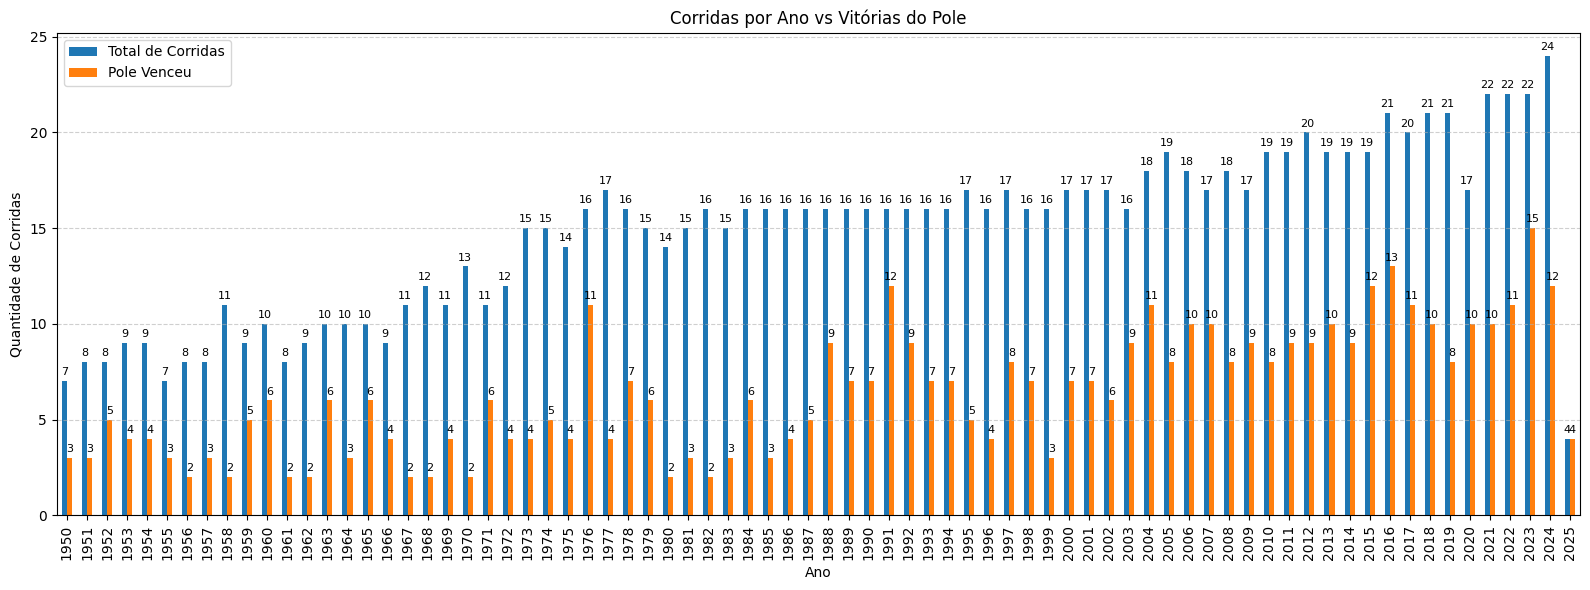

In [371]:
import matplotlib.pyplot as plt

# Total de corridas por ano
total_por_ano = df_final.groupby('year').size()
pole_ganhou_por_ano = df_final[df_final['pole_ganhou']].groupby('year').size()

# Juntando em um DataFrame
result = pd.DataFrame({
    'total_corridas': total_por_ano,
    'pole_venceu': pole_ganhou_por_ano
}).fillna(0)

result['pole_venceu'] = result['pole_venceu'].astype(int)

# Plotando
ax = result.plot(kind='bar', figsize=(16, 6))
plt.title('Corridas por Ano vs Vitórias do Pole')
plt.ylabel('Quantidade de Corridas')
plt.xlabel('Ano')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Total de Corridas', 'Pole Venceu'])
plt.tight_layout()

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2,
                altura + 0.2,                 # ajusta posição vertical
                int(altura),                 # valor a ser exibido
                ha='center', va='bottom', fontsize=8)

plt.show()


In [396]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26911 entries, 0 to 26910
Columns: 233 entries, raceId to pole_ganhou
dtypes: bool(3), float64(150), int64(7), object(73)
memory usage: 47.3+ MB


In [395]:
df_merge.head()

,raceId,year,round,date,time,grandPrixId,officialName,qualifyingFormat,sprintQualifyingFormat,circuitId,circuitType,direction,courseLength,turns,laps,distance,scheduledLaps,scheduledDistance,driversChampionshipDecider,constructorsChampionshipDecider,preQualifyingDate,preQualifyingTime,freePractice1Date,freePractice1Time,freePractice2Date,freePractice2Time,freePractice3Date,freePractice3Time,freePractice4Date,freePractice4Time,qualifying1Date,qualifying1Time,qualifying2Date,qualifying2Time,qualifyingDate,qualifyingTime,sprintQualifyingDate,sprintQualifyingTime,sprintRaceDate,sprintRaceTime,warmingUpDate,warmingUpTime,races_race_results_year,races_race_results_round,races_race_results_positionDisplayOrder,races_race_results_positionNumber,races_race_results_positionText,races_race_results_driverNumber,driverId,constructorId,engineManufacturerId,tyreManufacturerId,races_race_results_sharedCar,races_race_results_laps,races_race_results_time,races_race_results_timeMillis,races_race_results_timePenalty,races_race_results_timePenaltyMillis,races_race_results_gap,races_race_results_gapMillis,races_race_results_gapLaps,races_race_results_interval,races_race_results_intervalMillis,races_race_results_reasonRetired,races_race_results_points,races_race_results_polePosition,races_race_results_qualificationPositionNumber,races_race_results_qualificationPositionText,races_race_results_gridPositionNumber,races_race_results_gridPositionText,races_race_results_positionsGained,races_race_results_pitStops,races_race_results_fastestLap,races_race_results_driverOfTheDay,races_race_results_grandSlam,races_constructor_standings_year,races_constructor_standings_round,races_constructor_standings_positionDisplayOrder,races_constructor_standings_positionNumber,races_constructor_standings_positionText,races_constructor_standings_points,races_constructor_standings_positionsGained,races_driver_standings_year,races_driver_standings_round,races_driver_standings_positionDisplayOrder,races_driver_standings_positionNumber,races_driver_standings_positionText,races_driver_standings_points,races_driver_standings_positionsGained,races_fastest_laps_year,races_fastest_laps_round,races_fastest_laps_positionDisplayOrder,races_fastest_laps_positionNumber,races_fastest_laps_positionText,races_fastest_laps_driverNumber,races_fastest_laps_lap,races_fastest_laps_time,races_fastest_laps_timeMillis,races_fastest_laps_gap,races_fastest_laps_gapMillis,races_fastest_laps_interval,races_fastest_laps_intervalMillis,races_starting_grid_positions_year,races_starting_grid_positions_round,races_starting_grid_positions_positionDisplayOrder,races_starting_grid_positions_positionNumber,races_starting_grid_positions_positionText,races_starting_grid_positions_driverNumber,races_starting_grid_positions_qualificationPositionNumber,races_starting_grid_positions_qualificationPositionText,races_starting_grid_positions_gridPenalty,races_starting_grid_positions_gridPenaltyPositions,races_starting_grid_positions_time,races_starting_grid_positions_timeMillis,circuits_name,circuits_fullName,circuits_previousNames,circuits_type,circuits_direction,circuits_placeName,countryId_x,circuits_latitude,circuits_longitude,circuits_length,circuits_turns,circuits_totalRacesHeld,constructors_name,constructors_fullName,countryId_y,constructors_bestChampionshipPosition,constructors_bestStartingGridPosition,constructors_bestRaceResult,constructors_totalChampionshipWins,constructors_totalRaceEntries,constructors_totalRaceStarts,constructors_totalRaceWins,constructors_total1And2Finishes,constructors_totalRaceLaps,constructors_totalPodiums,constructors_totalPodiumRaces,constructors_totalPoints,constructors_totalChampionshipPoints,constructors_totalPolePositions,constructors_totalFastestLaps,drivers_name,drivers_firstName,drivers_lastName,drivers_fullName,drivers_abbreviation,drivers_permanentNumber,drivers_gender,drivers_dateOfBirth,drivers_dateOfDeath,drivers_placeOfBirth,countryOfBirthCountryId,nationalityCountryId,se

In [388]:
df_sorted = df_merge[['raceId', 'year', 'pole_ganhou', 'circuitId']].sort_values(by='pole_ganhou', ascending=False)
df_final = df_sorted.drop_duplicates(subset='raceId', keep='first').sort_values('raceId')
df_final


,raceId,year,pole_ganhou,circuitId
0,1,1950,True,silverstone
23,2,1950,True,monaco
77,3,1950,False,indianapolis
80,4,1950,False,bremgarten
103,5,1950,False,spa-francorchamps
...,...,...,...,...
26906,1145,2025,False,mexico-city
26907,1146,2025,False,interlagos
26908,1147,2025,False,las-vegas
26909,1148,2025,False,lusail


In [401]:
df_merge['qualifyingFormat'].unique()

array(['TWO_SESSION', 'FOUR_LAPS', 'ONE_SESSION', 'ONE_LAP', 'AGGREGATE',
       'KNOCKOUT', 'ELIMINATION', 'SPRINT_RACE'], dtype=object)

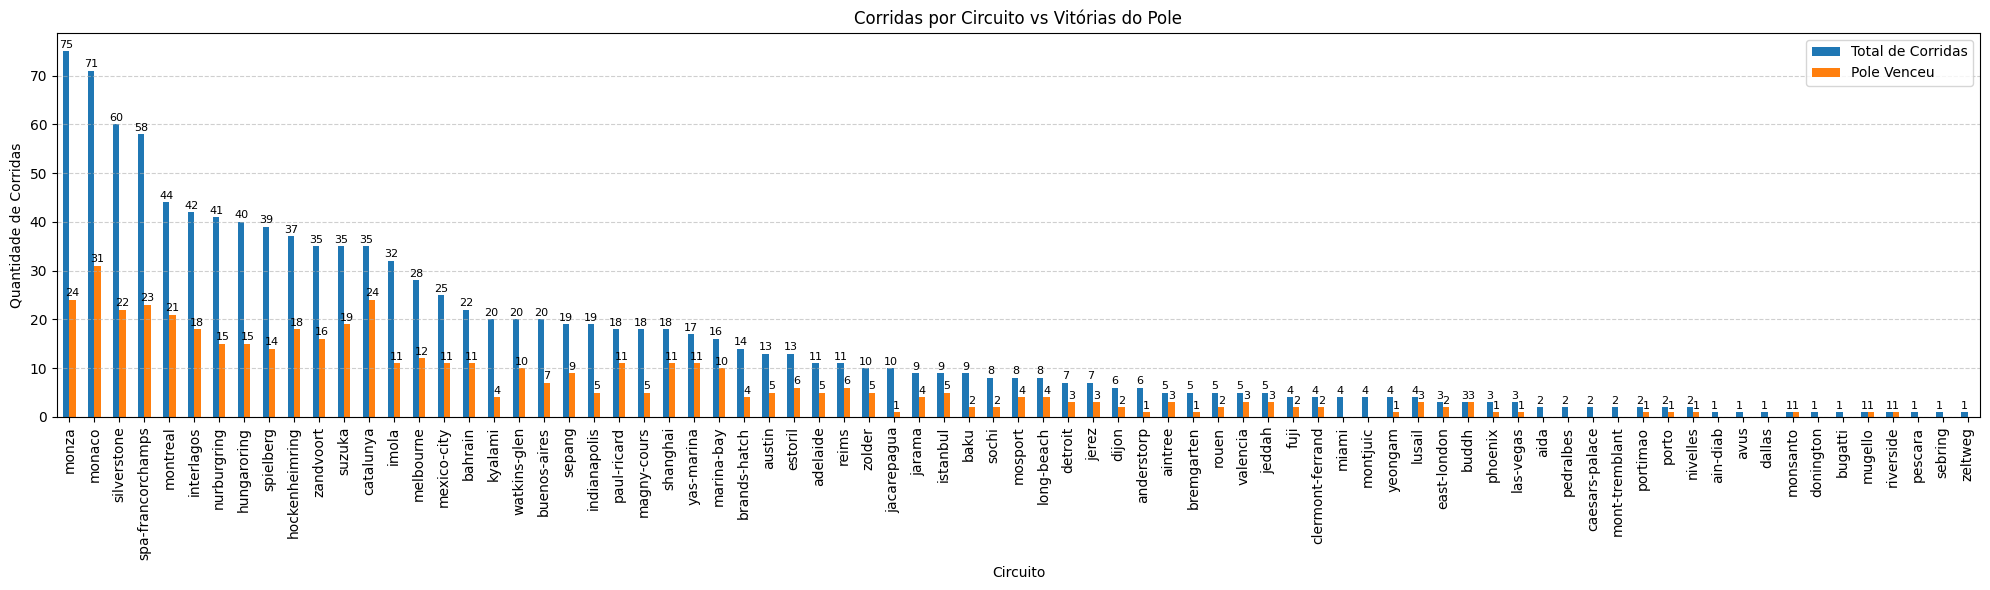

In [ ]:
import matplotlib.pyplot as plt

# Total de corridas por circuito
total_por_circuito = df_final.groupby('circuitId').size()

# Corridas em que o pole venceu por circuito
pole_ganhou_por_circuito = df_final[df_final['pole_ganhou']].groupby('circuitId').size()

# Garantir que ambas as séries tenham os mesmos circuitos
result = pd.DataFrame({
    'total_corridas': total_por_circuito,
    'pole_venceu': pole_ganhou_por_circuito
}).fillna(0)

# Converter pole_venceu para inteiro
result['pole_venceu'] = result['pole_venceu'].astype(int)

# Ordena por total de corridas para melhor visualização
result = result.sort_values(by='total_corridas', ascending=False)

# Plotando
ax = result.plot(kind='bar', figsize=(20, 6))
plt.title('Corridas por Circuito vs Vitórias do Pole')
plt.ylabel('Quantidade de Corridas')
plt.xlabel('Circuito')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Total de Corridas', 'Pole Venceu'])
plt.tight_layout()

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2,
                altura + 0.3,
                int(altura),
                ha='center', va='bottom', fontsize=8)

plt.show()


In [334]:
len(list(df_races_race_results['raceId'].unique()))

1129

In [335]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   raceId                           1149 non-null   int64  
 1   year                             1149 non-null   int64  
 2   round                            1149 non-null   int64  
 3   date                             1149 non-null   object 
 4   time                             48 non-null     object 
 5   grandPrixId                      1149 non-null   object 
 6   officialName                     1149 non-null   object 
 7   qualifyingFormat                 1149 non-null   object 
 8   sprintQualifyingFormat           18 non-null     object 
 9   circuitId                        1149 non-null   object 
 10  circuitType                      1149 non-null   object 
 11  direction                        1149 non-null   object 
 12  courseLength        

In [331]:
df_races_race_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26891 entries, 0 to 26890
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   raceId                       26891 non-null  int64  
 1   year                         26891 non-null  int64  
 2   round                        26891 non-null  int64  
 3   positionDisplayOrder         26891 non-null  int64  
 4   positionNumber               16078 non-null  float64
 5   positionText                 26891 non-null  object 
 6   driverNumber                 26891 non-null  int64  
 7   driverId                     26891 non-null  object 
 8   constructorId                26891 non-null  object 
 9   engineManufacturerId         26891 non-null  object 
 10  tyreManufacturerId           26891 non-null  object 
 11  sharedCar                    26891 non-null  bool   
 12  laps                         24971 non-null  float64
 13  time            

In [328]:
df_merge.head()

,raceId,year,round,date,time,grandPrixId,officialName,qualifyingFormat,sprintQualifyingFormat,circuitId,circuitType,direction,courseLength,turns,laps,distance,scheduledLaps,scheduledDistance,driversChampionshipDecider,constructorsChampionshipDecider,preQualifyingDate,preQualifyingTime,freePractice1Date,freePractice1Time,freePractice2Date,freePractice2Time,freePractice3Date,freePractice3Time,freePractice4Date,freePractice4Time,qualifying1Date,qualifying1Time,qualifying2Date,qualifying2Time,qualifyingDate,qualifyingTime,sprintQualifyingDate,sprintQualifyingTime,sprintRaceDate,sprintRaceTime,warmingUpDate,warmingUpTime,races_race_results_year,races_race_results_round,races_race_results_positionDisplayOrder,races_race_results_positionNumber,races_race_results_positionText,races_race_results_driverNumber,driverId,constructorId,engineManufacturerId,tyreManufacturerId,races_race_results_sharedCar,races_race_results_laps,races_race_results_time,races_race_results_timeMillis,races_race_results_timePenalty,races_race_results_timePenaltyMillis,races_race_results_gap,races_race_results_gapMillis,races_race_results_gapLaps,races_race_results_interval,races_race_results_intervalMillis,races_race_results_reasonRetired,races_race_results_points,races_race_results_polePosition,races_race_results_qualificationPositionNumber,races_race_results_qualificationPositionText,races_race_results_gridPositionNumber,races_race_results_gridPositionText,races_race_results_positionsGained,races_race_results_pitStops,races_race_results_fastestLap,races_race_results_driverOfTheDay,races_race_results_grandSlam,races_constructor_standings_year,races_constructor_standings_round,races_constructor_standings_positionDisplayOrder,races_constructor_standings_positionNumber,races_constructor_standings_positionText,races_constructor_standings_points,races_constructor_standings_positionsGained,races_driver_standings_year,races_driver_standings_round,races_driver_standings_positionDisplayOrder,races_driver_standings_positionNumber,races_driver_standings_positionText,races_driver_standings_points,races_driver_standings_positionsGained,races_fastest_laps_year,races_fastest_laps_round,races_fastest_laps_positionDisplayOrder,races_fastest_laps_positionNumber,races_fastest_laps_positionText,races_fastest_laps_driverNumber,races_fastest_laps_lap,races_fastest_laps_time,races_fastest_laps_timeMillis,races_fastest_laps_gap,races_fastest_laps_gapMillis,races_fastest_laps_interval,races_fastest_laps_intervalMillis,races_starting_grid_positions_year,races_starting_grid_positions_round,races_starting_grid_positions_positionDisplayOrder,races_starting_grid_positions_positionNumber,races_starting_grid_positions_positionText,races_starting_grid_positions_driverNumber,races_starting_grid_positions_qualificationPositionNumber,races_starting_grid_positions_qualificationPositionText,races_starting_grid_positions_gridPenalty,races_starting_grid_positions_gridPenaltyPositions,races_starting_grid_positions_time,races_starting_grid_positions_timeMillis,circuits_name,circuits_fullName,circuits_previousNames,circuits_type,circuits_direction,circuits_placeName,countryId_x,circuits_latitude,circuits_longitude,circuits_length,circuits_turns,circuits_totalRacesHeld,constructors_name,constructors_fullName,countryId_y,constructors_bestChampionshipPosition,constructors_bestStartingGridPosition,constructors_bestRaceResult,constructors_totalChampionshipWins,constructors_totalRaceEntries,constructors_totalRaceStarts,constructors_totalRaceWins,constructors_total1And2Finishes,constructors_totalRaceLaps,constructors_totalPodiums,constructors_totalPodiumRaces,constructors_totalPoints,constructors_totalChampionshipPoints,constructors_totalPolePositions,constructors_totalFastestLaps,drivers_name,drivers_firstName,drivers_lastName,drivers_fullName,drivers_abbreviation,drivers_permanentNumber,drivers_gender,drivers_dateOfBirth,drivers_dateOfDeath,drivers_placeOfBirth,countryOfBirthCountryId,nationalityCountryId,se

In [ ]:
df_merge['']

In [290]:
sorted(list(df_merge.columns))

['circuitId',
 'circuitType',
 'circuits_direction',
 'circuits_fullName',
 'circuits_latitude',
 'circuits_length',
 'circuits_longitude',
 'circuits_name',
 'circuits_placeName',
 'circuits_previousNames',
 'circuits_totalRacesHeld',
 'circuits_turns',
 'circuits_type',
 'constructorId',
 'constructorsChampionshipDecider',
 'constructors_bestChampionshipPosition',
 'constructors_bestRaceResult',
 'constructors_bestStartingGridPosition',
 'constructors_fullName',
 'constructors_name',
 'constructors_total1And2Finishes',
 'constructors_totalChampionshipPoints',
 'constructors_totalChampionshipWins',
 'constructors_totalFastestLaps',
 'constructors_totalPodiumRaces',
 'constructors_totalPodiums',
 'constructors_totalPoints',
 'constructors_totalPolePositions',
 'constructors_totalRaceEntries',
 'constructors_totalRaceLaps',
 'constructors_totalRaceStarts',
 'constructors_totalRaceWins',
 'countryId',
 'countryId_x',
 'countryId_y',
 'countryOfBirthCountryId',
 'courseLength',
 'date',
 

In [313]:
df_merge.head()

,raceId,year,round,date,time,grandPrixId,officialName,qualifyingFormat,sprintQualifyingFormat,circuitId,circuitType,direction,courseLength,turns,laps,distance,scheduledLaps,scheduledDistance,driversChampionshipDecider,constructorsChampionshipDecider,preQualifyingDate,preQualifyingTime,freePractice1Date,freePractice1Time,freePractice2Date,freePractice2Time,freePractice3Date,freePractice3Time,freePractice4Date,freePractice4Time,qualifying1Date,qualifying1Time,qualifying2Date,qualifying2Time,qualifyingDate,qualifyingTime,sprintQualifyingDate,sprintQualifyingTime,sprintRaceDate,sprintRaceTime,warmingUpDate,warmingUpTime,races_race_results_year,races_race_results_round,races_race_results_positionDisplayOrder,races_race_results_positionNumber,races_race_results_positionText,races_race_results_driverNumber,driverId,constructorId,engineManufacturerId,tyreManufacturerId,races_race_results_sharedCar,races_race_results_laps,races_race_results_time,races_race_results_timeMillis,races_race_results_timePenalty,races_race_results_timePenaltyMillis,races_race_results_gap,races_race_results_gapMillis,races_race_results_gapLaps,races_race_results_interval,races_race_results_intervalMillis,races_race_results_reasonRetired,races_race_results_points,races_race_results_polePosition,races_race_results_qualificationPositionNumber,races_race_results_qualificationPositionText,races_race_results_gridPositionNumber,races_race_results_gridPositionText,races_race_results_positionsGained,races_race_results_pitStops,races_race_results_fastestLap,races_race_results_driverOfTheDay,races_race_results_grandSlam,races_constructor_standings_year,races_constructor_standings_round,races_constructor_standings_positionDisplayOrder,races_constructor_standings_positionNumber,races_constructor_standings_positionText,races_constructor_standings_points,races_constructor_standings_positionsGained,races_driver_standings_year,races_driver_standings_round,races_driver_standings_positionDisplayOrder,races_driver_standings_positionNumber,races_driver_standings_positionText,races_driver_standings_points,races_driver_standings_positionsGained,races_fastest_laps_year,races_fastest_laps_round,races_fastest_laps_positionDisplayOrder,races_fastest_laps_positionNumber,races_fastest_laps_positionText,races_fastest_laps_driverNumber,races_fastest_laps_lap,races_fastest_laps_time,races_fastest_laps_timeMillis,races_fastest_laps_gap,races_fastest_laps_gapMillis,races_fastest_laps_interval,races_fastest_laps_intervalMillis,races_starting_grid_positions_year,races_starting_grid_positions_round,races_starting_grid_positions_positionDisplayOrder,races_starting_grid_positions_positionNumber,races_starting_grid_positions_positionText,races_starting_grid_positions_driverNumber,races_starting_grid_positions_qualificationPositionNumber,races_starting_grid_positions_qualificationPositionText,races_starting_grid_positions_gridPenalty,races_starting_grid_positions_gridPenaltyPositions,races_starting_grid_positions_time,races_starting_grid_positions_timeMillis,circuits_name,circuits_fullName,circuits_previousNames,circuits_type,circuits_direction,circuits_placeName,countryId_x,circuits_latitude,circuits_longitude,circuits_length,circuits_turns,circuits_totalRacesHeld,constructors_name,constructors_fullName,countryId_y,constructors_bestChampionshipPosition,constructors_bestStartingGridPosition,constructors_bestRaceResult,constructors_totalChampionshipWins,constructors_totalRaceEntries,constructors_totalRaceStarts,constructors_totalRaceWins,constructors_total1And2Finishes,constructors_totalRaceLaps,constructors_totalPodiums,constructors_totalPodiumRaces,constructors_totalPoints,constructors_totalChampionshipPoints,constructors_totalPolePositions,constructors_totalFastestLaps,drivers_name,drivers_firstName,drivers_lastName,drivers_fullName,drivers_abbreviation,drivers_permanentNumber,drivers_gender,drivers_dateOfBirth,drivers_dateOfDeath,drivers_placeOfBirth,countryOfBirthCountryId,nationalityCountryId,se